## Increase versatility of coupled dipole code

Currently, I have to make a for loop to generate a spectrum. I would like to just be able to give the code an array of omega's, and it automaticallly returns the arrayed spectrum. I will also need to do this for the radii and position inputs.


In [1]:
from coupled_dipole_model import Sphere_Polarizability
from coupled_dipole_model import CrossSections
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

hbar_eVs = 6.58212E-16 # Planck's constant [eV*s]
c = 2.998E+10 # speed of light [cm/s]


## Two Spheres


In [2]:
num = 2
def make_spherehomodimer_input(radius, gap, N=num):
    def_centers = np.zeros((N, 3))
    def_all_radii = np.zeros((N))
    def_centers[0,:] = np.array([ 0, 0, -radius-gap/2 ])*1.E-7
    def_centers[1,:] = np.array([ 0, 0, radius+gap/2 ])*1.E-7
    def_all_radii[0] = radius*1.E-7
    def_all_radii[1] = radius*1.E-7
    return def_centers, def_all_radii


(500, 2)


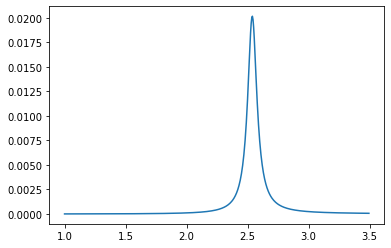

In [3]:
w_all = np.arange(1,3.5,.005)/hbar_eVs
def_centers, def_all_radii = make_spherehomodimer_input(radius=20, gap=10)
calc_dips = CrossSections(centers=def_centers, 
                                   all_radii=def_all_radii,
                                   w=w_all,
                                   num=num, 
                                   n=1.0, 
                                   wp=8.959/hbar_eVs, 
                                   eps_inf=9.695, 
                                   gam_drude=0.073/hbar_eVs)    

Pext, Pabs = calc_dips.cross_sects(drive=np.array([0, 0, 1]))
plt.plot(w_all*hbar_eVs, Pabs[:,1]+Pabs[:,0])


print(Pabs.shape)



In [4]:
def_centers, def_all_radii = make_spherehomodimer_input(radius=20, gap=10)
sph_pol = Sphere_Polarizability(centers=def_centers, 
                                   all_radii=def_all_radii, 
                                   n=1.0, 
                                   wp=8.959/hbar_eVs, 
                                   eps_inf=9.695, 
                                   gam_drude=0.073/hbar_eVs)   

w_all = np.arange(1,3.5,.1)/hbar_eVs

type(sph_pol.alpha(w=w_all, radius=def_all_radii[0]))

numpy.ndarray